In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [5]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [6]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
history_sgd = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/5
469/469 [==============================] - 21s 44ms/step - loss: 1.4074 - accuracy: 0.5575 - val_loss: 0.5117 - val_accuracy: 0.8182
Epoch 2/5
469/469 [==============================] - 21s 44ms/step - loss: 0.3686 - accuracy: 0.8874 - val_loss: 0.2655 - val_accuracy: 0.9222
Epoch 3/5
469/469 [==============================] - 21s 44ms/step - loss: 0.2548 - accuracy: 0.9230 - val_loss: 0.2043 - val_accuracy: 0.9380
Epoch 4/5
469/469 [==============================] - 21s 45ms/step - loss: 0.1919 - accuracy: 0.9415 - val_loss: 0.1509 - val_accuracy: 0.9545
Epoch 5/5
469/469 [==============================] - 20s 44ms/step - loss: 0.1549 - accuracy: 0.9540 - val_loss: 0.1274 - val_accuracy: 0.9626


In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
history_adam = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/5
469/469 [==============================] - 21s 44ms/step - loss: 0.1669 - accuracy: 0.9526 - val_loss: 0.0540 - val_accuracy: 0.9812
Epoch 2/5
469/469 [==============================] - 22s 48ms/step - loss: 0.0578 - accuracy: 0.9822 - val_loss: 0.0423 - val_accuracy: 0.9865
Epoch 3/5
469/469 [==============================] - 21s 44ms/step - loss: 0.0392 - accuracy: 0.9879 - val_loss: 0.0373 - val_accuracy: 0.9882
Epoch 4/5
469/469 [==============================] - 21s 45ms/step - loss: 0.0296 - accuracy: 0.9908 - val_loss: 0.0282 - val_accuracy: 0.9918
Epoch 5/5
469/469 [==============================] - 21s 44ms/step - loss: 0.0239 - accuracy: 0.9924 - val_loss: 0.0283 - val_accuracy: 0.9905


In [12]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
history_rmsprop = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/5
469/469 [==============================] - 21s 43ms/step - loss: 0.0196 - accuracy: 0.9936 - val_loss: 0.0306 - val_accuracy: 0.9915
Epoch 2/5
469/469 [==============================] - 20s 43ms/step - loss: 0.0152 - accuracy: 0.9951 - val_loss: 0.0278 - val_accuracy: 0.9926
Epoch 3/5
469/469 [==============================] - 21s 45ms/step - loss: 0.0120 - accuracy: 0.9962 - val_loss: 0.0289 - val_accuracy: 0.9930
Epoch 4/5
469/469 [==============================] - 20s 43ms/step - loss: 0.0100 - accuracy: 0.9968 - val_loss: 0.0272 - val_accuracy: 0.9926
Epoch 5/5
469/469 [==============================] - 21s 44ms/step - loss: 0.0085 - accuracy: 0.9973 - val_loss: 0.0289 - val_accuracy: 0.9916


In [14]:
sgd_training_acc = history_sgd.history['accuracy']
sgd_val_acc = history_sgd.history['val_accuracy']
sgd_loss =history_sgd.history['loss']

adam_training_acc = history_adam.history['accuracy']
adam_val_acc = history_adam.history['val_accuracy']
adam_loss =history_adam.history['loss']

rmsprop_training_acc = history_rmsprop.history['accuracy']
rmsprop_val_acc = history_rmsprop.history['val_accuracy']
rmsprop_loss =history_rmsprop.history['loss']

Text(0.5, 0, 'RMSProp Validation Accuracy')

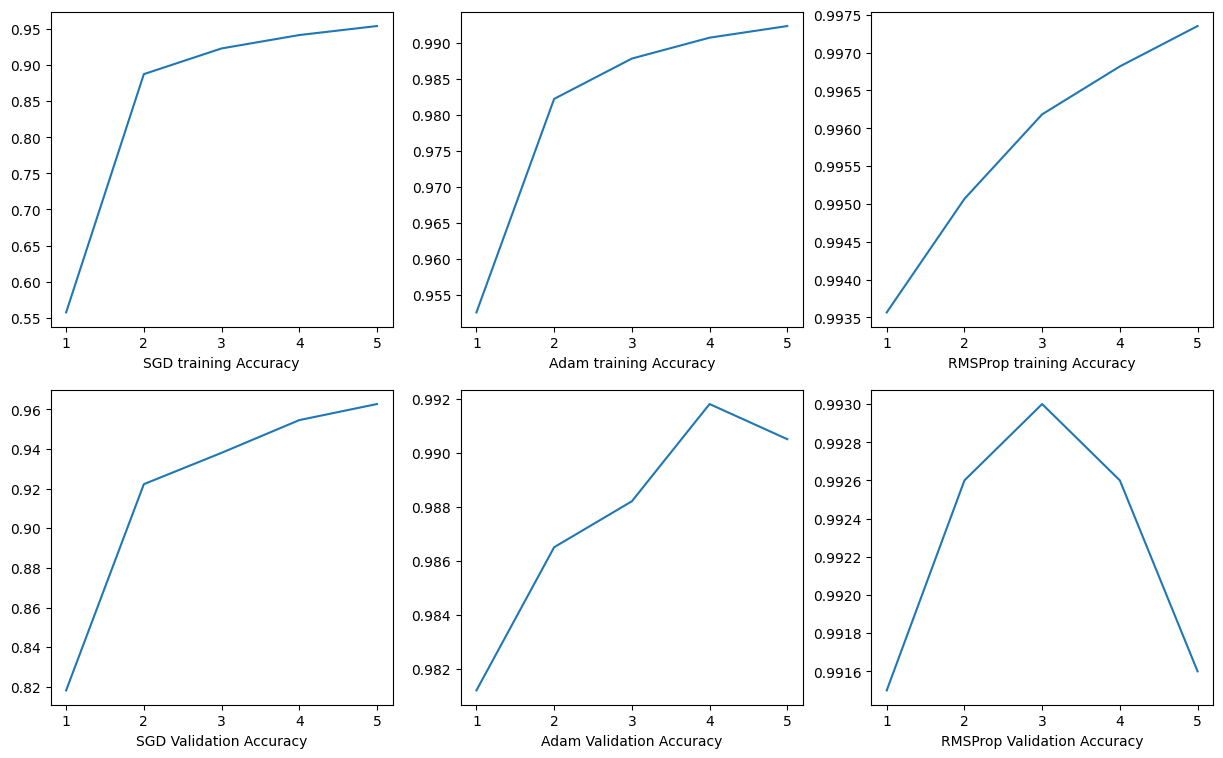

In [15]:
list = [1,2,3,4,5]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 9))

axes[0, 0].plot(list, sgd_training_acc, label='SGD training Accuracy')
axes[0, 0].set_xlabel('SGD training Accuracy')
axes[1, 0].plot(list, sgd_val_acc, label='SGD Validation Accuracy')
axes[1, 0].set_xlabel('SGD Validation Accuracy')


axes[0, 1].plot(list, adam_training_acc, label='Adam training Accuracy')
axes[0, 1].set_xlabel('Adam training Accuracy')
axes[1, 1].plot(list, adam_val_acc, label='SGD Validation Accuracy')
axes[1, 1].set_xlabel('Adam Validation Accuracy')


axes[0, 2].plot(list, rmsprop_training_acc, label='RMSProp training Accuracy')
axes[0, 2].set_xlabel('RMSProp training Accuracy')
axes[1, 2].plot(list, rmsprop_val_acc, label='RMSProp Validation Accuracy')
axes[1, 2].set_xlabel('RMSProp Validation Accuracy')

Text(0.5, 1.0, 'RmsProp LOSS')

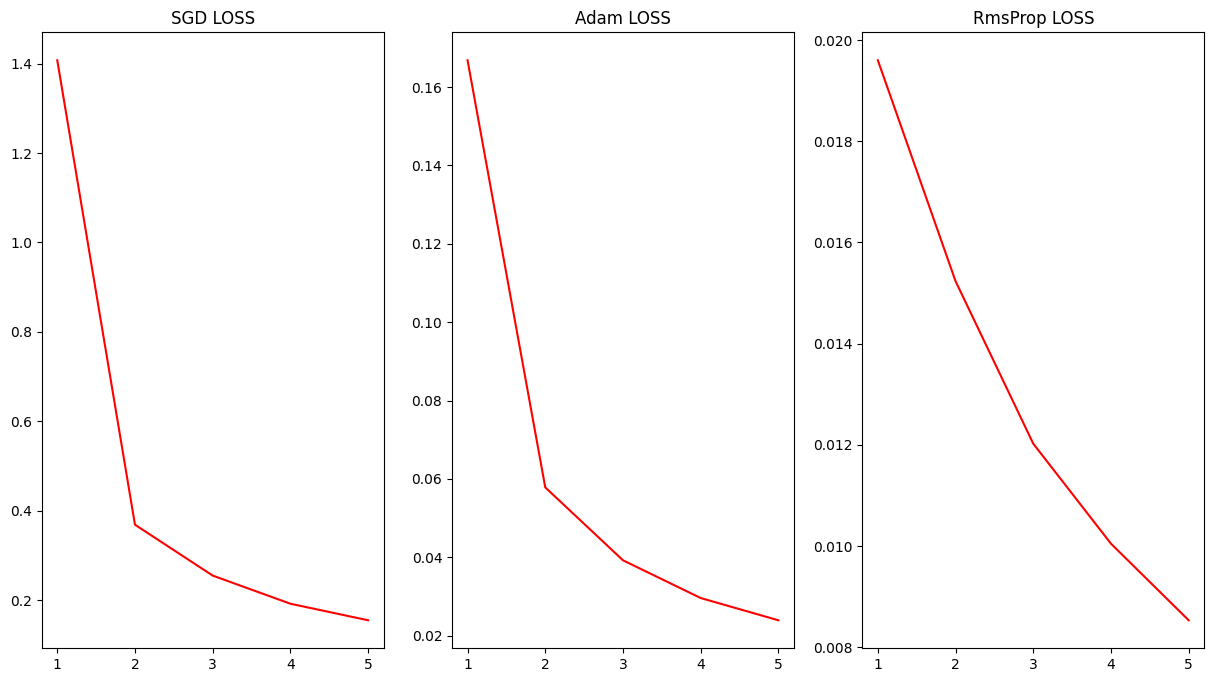

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 8))

ax1.plot(list, sgd_loss, color='r')
ax1.set_title('SGD LOSS')

ax2.plot(list, adam_loss, color='r')
ax2.set_title('Adam LOSS')

ax3.plot(list, rmsprop_loss, color='r')
ax3.set_title('RmsProp LOSS')